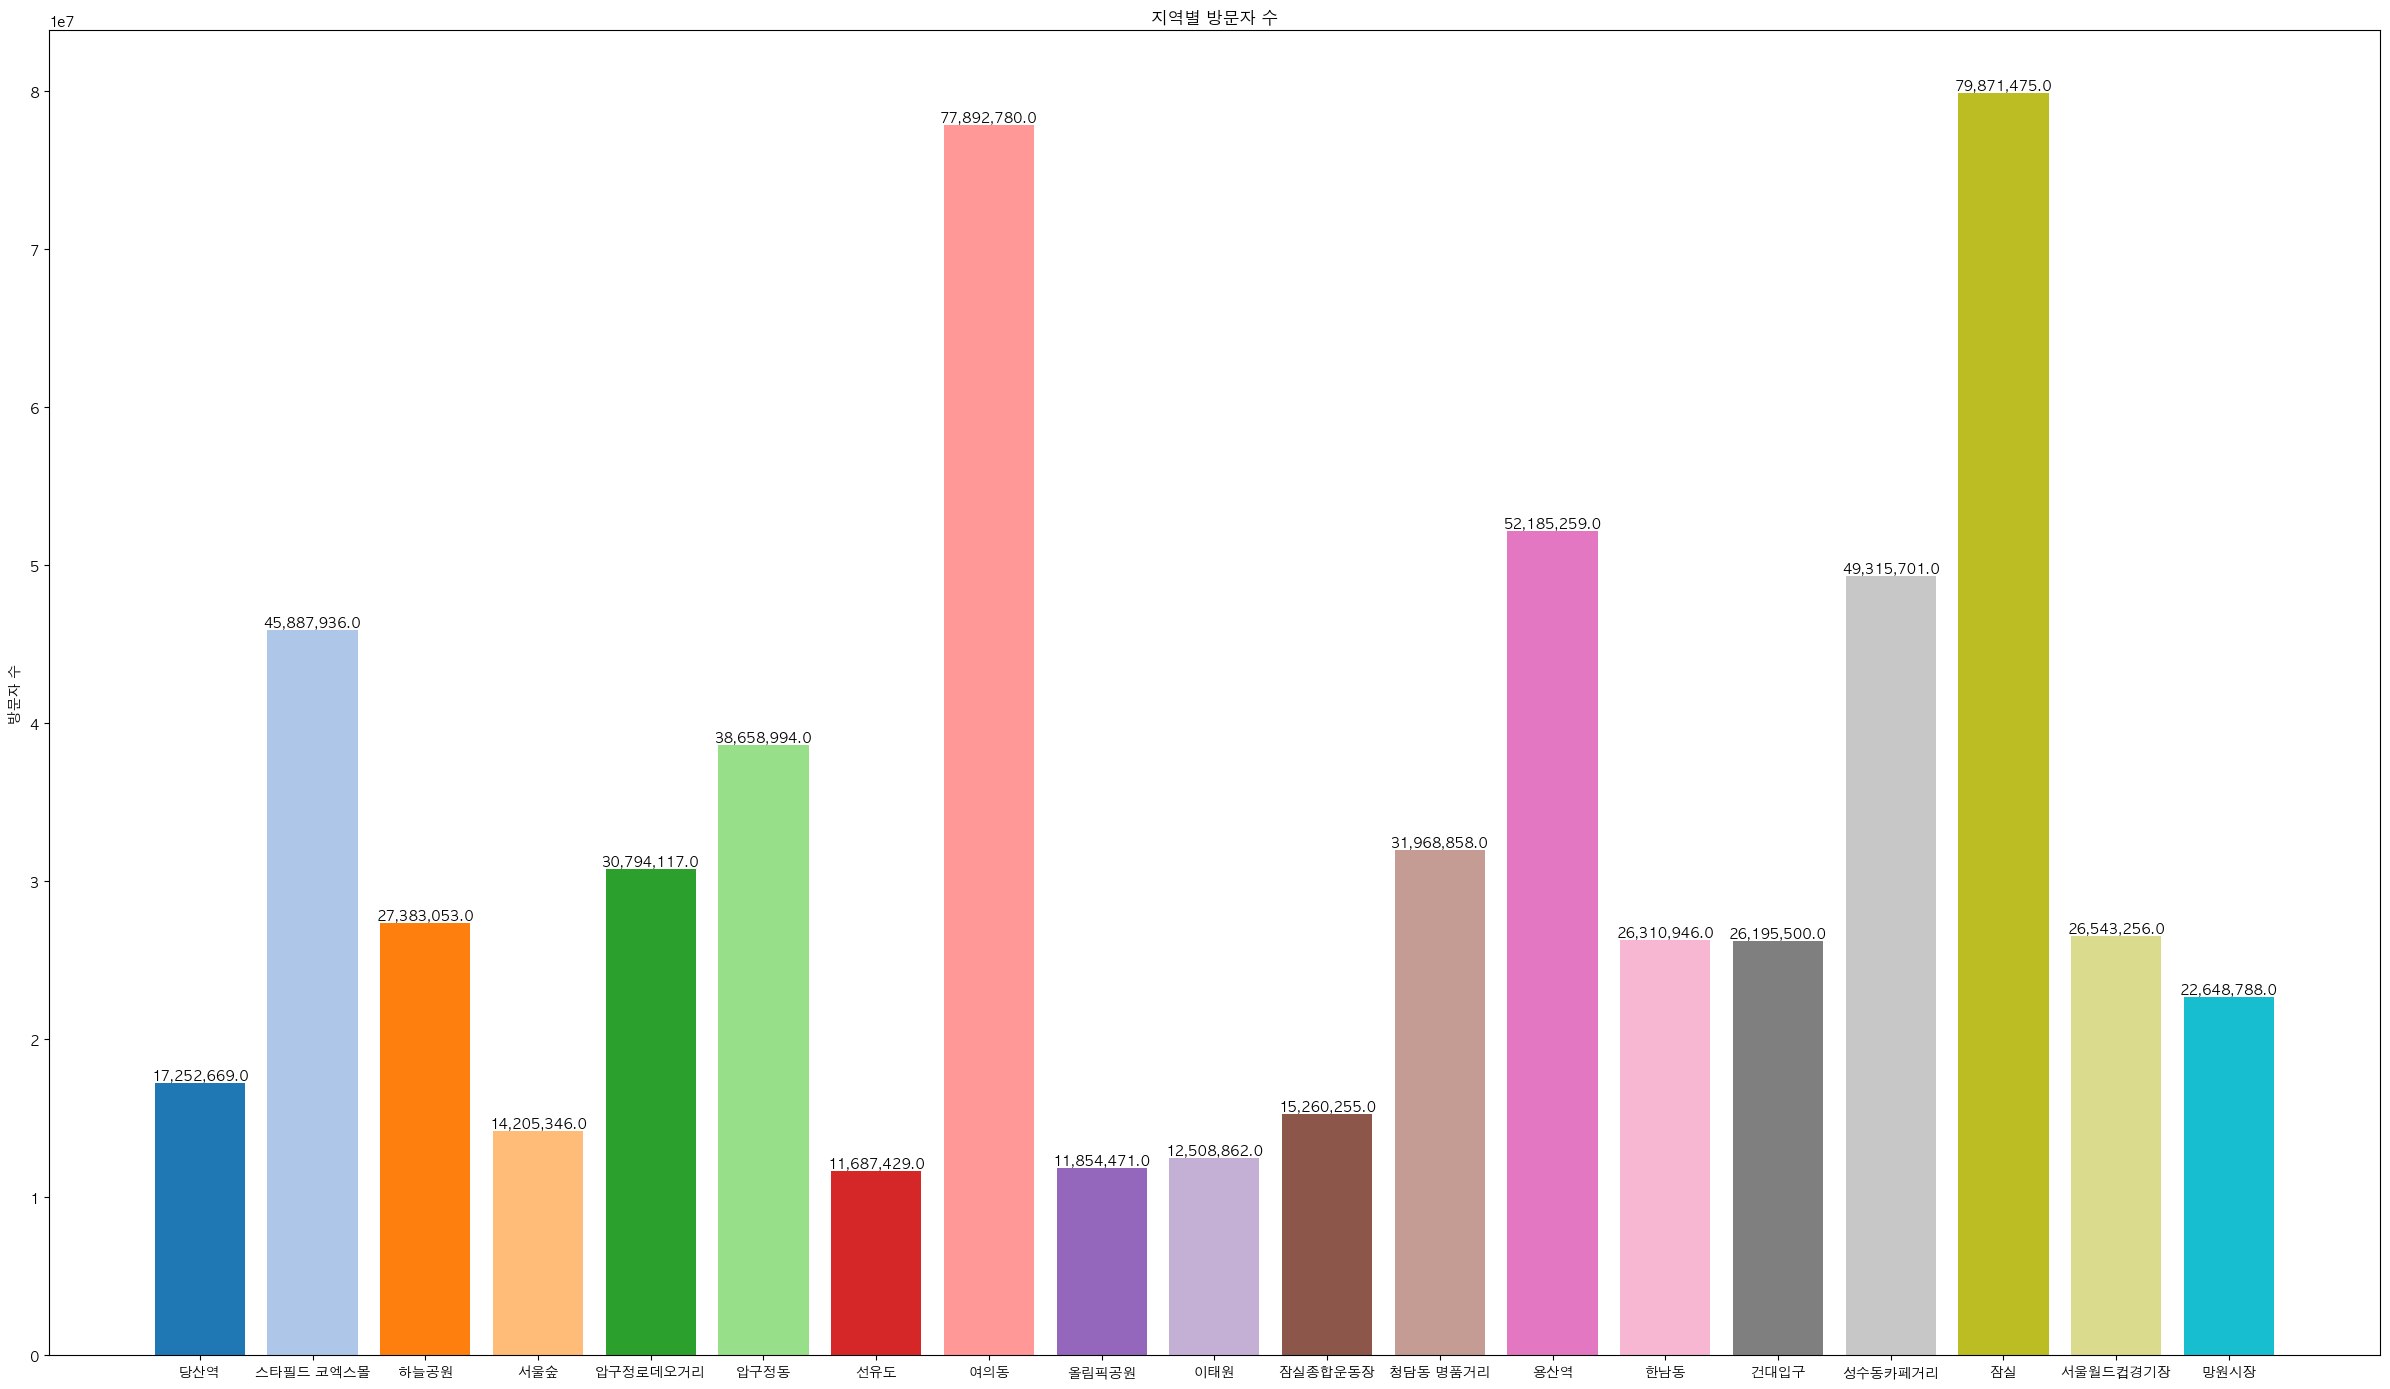

CSV 파일이 다음 경로에 저장되었습니다: /Users/kimhyewon/Desktop/hotplace_df.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 읽기
file_path1 = '강남 방문자수.csv'
df1 = pd.read_csv(file_path1, encoding='cp949', low_memory=False)

file_path2 = '성수건대 방문자수.csv'
df2 = pd.read_csv(file_path2, encoding='cp949', low_memory=False)

file_path3 = '잠실 방문자수.csv'
df3 = pd.read_csv(file_path3, encoding='cp949', low_memory=False)

file_path4 = '용산구 방문자수.csv'
df4 = pd.read_csv(file_path4, encoding='cp949', low_memory=False)

file_path5 = '마포구 방문자수.csv'
df5 = pd.read_csv(file_path5, encoding='cp949', low_memory=False)

file_path6 = '영등포구 방문자수.csv'
df6 = pd.read_csv(file_path6, encoding='cp949', low_memory=False)

# 데이터프레임 합치기
total_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
new_df = total_df.iloc[4::5, :]

# 지자체별 방문자수 합계 계산
new_df_grouped = new_df.groupby('지자체')['방문자수'].sum().reset_index()

# 인덱스 번호 설정
indices_to_combine_sungsu = [8, 9, 10]
indices_to_combine_jamsil = [18, 19]
indices_to_combine_seongsan = [5, 6]
indices_to_combine_mangwon = [1, 2]

# 행 추가 여부 확인
already_combined_sungsu = new_df_grouped[new_df_grouped['지자체'] == '성수동카페거리'].shape[0] > 0
already_combined_jamsil = new_df_grouped[new_df_grouped['지자체'] == '잠실'].shape[0] > 0
already_combined_seongsan = new_df_grouped[new_df_grouped['지자체'] == '성산동'].shape[0] > 0
already_combined_mangwon = new_df_grouped[new_df_grouped['지자체'] == '망원동'].shape[0] > 0

# '성수동카페거리' 행 추가
if not already_combined_sungsu:
    combined_visitors_sungsu = new_df_grouped.loc[indices_to_combine_sungsu, '방문자수'].sum()
    new_row_sungsu = pd.DataFrame({'지자체': ['성수동카페거리'], '방문자수': [combined_visitors_sungsu]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_sungsu], ignore_index=True)

# '잠실' 행 추가
if not already_combined_jamsil:
    combined_visitors_jamsil = new_df_grouped.loc[indices_to_combine_jamsil, '방문자수'].sum()
    new_row_jamsil = pd.DataFrame({'지자체': ['잠실'], '방문자수': [combined_visitors_jamsil]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_jamsil], ignore_index=True)

# '성산동' 행 추가
if not already_combined_seongsan:
    combined_visitors_seongsan = new_df_grouped.loc[indices_to_combine_seongsan, '방문자수'].sum()
    new_row_seongsan = pd.DataFrame({'지자체': ['성산동'], '방문자수': [combined_visitors_seongsan]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_seongsan], ignore_index=True)

# '망원동' 행 추가
if not already_combined_mangwon:
    combined_visitors_mangwon = new_df_grouped.loc[indices_to_combine_mangwon, '방문자수'].sum()
    new_row_mangwon = pd.DataFrame({'지자체': ['망원동'], '방문자수': [combined_visitors_mangwon]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_mangwon], ignore_index=True)

# 새로운 데이터프레임 생성
hotplace_df = new_df_grouped.iloc[[0, 3, 4, 7, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27]].copy()

# '지자체' 이름 변경
hotplace_df.loc[hotplace_df['지자체'] == '삼성1동', '지자체'] = '스타필드 코엑스몰'
hotplace_df.loc[hotplace_df['지자체'] == '성수1가1동', '지자체'] = '서울숲'
hotplace_df.loc[hotplace_df['지자체'] == '신사동', '지자체'] = '압구정로데오거리'
hotplace_df.loc[hotplace_df['지자체'] == '청담동', '지자체'] = '청담동 명품거리'
hotplace_df.loc[hotplace_df['지자체'] == '잠실2동', '지자체'] = '잠실종합운동장'
hotplace_df.loc[hotplace_df['지자체'] == '화양동', '지자체'] = '건대입구'
hotplace_df.loc[hotplace_df['지자체'] == '한강로동', '지자체'] = '용산역'
hotplace_df.loc[hotplace_df['지자체'] == '이태원1동', '지자체'] = '이태원'
hotplace_df.loc[hotplace_df['지자체'] == '오륜동', '지자체'] = '올림픽공원'
hotplace_df.loc[hotplace_df['지자체'] == '상암동', '지자체'] = '하늘공원'
hotplace_df.loc[hotplace_df['지자체'] == '성산동', '지자체'] = '서울월드컵경기장'
hotplace_df.loc[hotplace_df['지자체'] == '망원동', '지자체'] = '망원시장'
hotplace_df.loc[hotplace_df['지자체'] == '합정동', '지자체'] = '합정역'
hotplace_df.loc[hotplace_df['지자체'] == '당산2동', '지자체'] = '당산역'
hotplace_df.loc[hotplace_df['지자체'] == '양평2동', '지자체'] = '선유도'

# 시각화
plt.figure(figsize=(24, 14))

# 각 막대의 색상을 다르게 설정
colors = plt.cm.tab20.colors  # 20가지 색상을 가진 컬러맵 사용
bars = plt.bar(hotplace_df['지자체'], hotplace_df['방문자수'], color=colors)

plt.title('지역별 방문자 수')
plt.ylabel('방문자 수')

# 각 막대 위에 수치 표시
for i, v in enumerate(hotplace_df['방문자수']):
    plt.text(i, v + 0.5, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

'''
output_file_path = '/Users/kimhyewon/Desktop/hotplace_df.csv'  # 경로를 실제로 저장하고 싶은 위치로 변경하세요
hotplace_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 다음 경로에 저장되었습니다: {output_file_path}")
'''

In [6]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    1440 non-null   int64  
 1   지자체     1440 non-null   object 
 2   방문자 구분  1440 non-null   object 
 3   방문자수    1440 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 45.1+ KB


In [17]:
import pandas as pd

file_path = '서울시 한강공원 이용객 현황.csv'
df = pd.read_csv(file_path, encoding='cp949', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   공원명          133 non-null    object 
 1   공원 시명        133 non-null    object 
 2   공원 구명        133 non-null    object 
 3   공원 지번 주소     133 non-null    object 
 4   공원 도로명 주소    133 non-null    object 
 5   등록 일시        133 non-null    object 
 6   수정자 일련번호     31 non-null     float64
 7   수정 일시        31 non-null     object 
 8   일반이용자(아침)    133 non-null    int64  
 9   일반이용자(낮)     133 non-null    int64  
 10  일반이용자(저녁)    133 non-null    int64  
 11  자전거          133 non-null    int64  
 12  인라인          133 non-null    int64  
 13  pm(개인형이동장치)  133 non-null    int64  
 14  주요행사         133 non-null    int64  
 15  마라톤          133 non-null    int64  
 16  운동시설         133 non-null    int64  
 17  야구장          133 non-null    int64  
 18  론볼링장         133 non-null    int64  
 19  트랙구장    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

file_path1 = '강남 방문자수.csv'
df1 = pd.read_csv(file_path1, encoding='cp949', low_memory=False)

file_path2 = '성수건대 방문자수.csv'
df2 = pd.read_csv(file_path2, encoding='cp949', low_memory=False)

file_path3 = '잠실 방문자수.csv'
df3 = pd.read_csv(file_path3, encoding='cp949', low_memory=False)

file_path4 = '용산구 방문자수.csv'
df4 = pd.read_csv(file_path4, encoding='cp949', low_memory=False)

file_path5 = '마포구 방문자수.csv'
df5 = pd.read_csv(file_path5, encoding='cp949', low_memory=False)

file_path6 = '영등포구 방문자수.csv'
df6 = pd.read_csv(file_path6, encoding='cp949', low_memory=False)

total_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
new_df = total_df.iloc[4::5, :]

new_df_grouped = new_df.groupby('지자체')['방문자수'].sum().reset_index()
new_df_grouped

,지자체,방문자수
0,당산2동,17252669.0
1,망원1동,13060504.0
2,망원2동,9588284.0
3,삼성1동,45887936.0
4,상암동,27383053.0
5,성산1동,9011738.0
6,성산2동,17531518.0
7,성수1가1동,14205346.0
8,성수1가2동,15640838.0
9,성수2가1동,11084062.0


In [3]:
import pandas as pd

# 성수1가2동, 성수2가1동, 성수2가3동의 인덱스 번호
indices_to_combine_sungsu = [8, 9, 10]
indices_to_combine_jamsil = [18, 19]
indices_to_combine_seongsan = [5, 6]
indices_to_combine_mangwon = [1, 2]

# 이미 '성수동카페거리' 행이 추가되었는지 여부 확인
already_combined_sungsu = new_df_grouped[new_df_grouped['지자체'] == '성수동카페거리'].shape[0] > 0
already_combined_jamsil = new_df_grouped[new_df_grouped['지자체'] == '잠실'].shape[0] > 0
already_combined_seongsan = new_df_grouped[new_df_grouped['지자체'] == '성산동'].shape[0] > 0
already_combined_mangwon = new_df_grouped[new_df_grouped['지자체'] == '망원동'].shape[0] > 0

# '성수동카페거리' 행이 추가되지 않은 경우에만 합치기 실행
if not already_combined_sungsu:
    # 성수1가2동, 성수2가1동, 성수2가3동의 방문자수 합계 계산
    combined_visitors_sungsu = new_df_grouped.loc[indices_to_combine_sungsu, '방문자수'].sum()

    # 새로운 행으로 '성수동카페거리' 추가
    new_row_sungsu = pd.DataFrame({'지자체': ['성수동카페거리'], '방문자수': [combined_visitors_sungsu]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_sungsu], ignore_index=True)

# '잠실' 행이 추가되지 않은 경우에만 합치기 실행
if not already_combined_jamsil:
    # 잠실3동과 잠실6동의 방문자수 합계 계산
    combined_visitors_jamsil = new_df_grouped.loc[indices_to_combine_jamsil, '방문자수'].sum()

    # 새로운 행으로 '잠실' 추가
    new_row_jamsil = pd.DataFrame({'지자체': ['잠실'], '방문자수': [combined_visitors_jamsil]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_jamsil], ignore_index=True)

# '성산동' 행이 추가되지 않은 경우에만 합치기 실행
if not already_combined_seongsan:
    # 성산1동과 성산2동의 방문자수 합계 계산
    combined_visitors_seongsan = new_df_grouped.loc[indices_to_combine_seongsan, '방문자수'].sum()

    # 새로운 행으로 '성산동' 추가
    new_row_seongsan = pd.DataFrame({'지자체': ['성산동'], '방문자수': [combined_visitors_seongsan]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_seongsan], ignore_index=True)

# '망원동' 행이 추가되지 않은 경우에만 합치기 실행
if not already_combined_mangwon:
    # 망원1동과 망원2동의 방문자수 합계 계산
    combined_visitors_mangwon = new_df_grouped.loc[indices_to_combine_mangwon, '방문자수'].sum()

    # 새로운 행으로 '망원동' 추가
    new_row_mangwon = pd.DataFrame({'지자체': ['망원동'], '방문자수': [combined_visitors_mangwon]})
    new_df_grouped = pd.concat([new_df_grouped, new_row_mangwon], ignore_index=True)

# 결과 출력
new_df_grouped


,지자체,방문자수
0,당산2동,17252669.0
1,망원1동,13060504.0
2,망원2동,9588284.0
3,삼성1동,45887936.0
4,상암동,27383053.0
5,성산1동,9011738.0
6,성산2동,17531518.0
7,성수1가1동,14205346.0
8,성수1가2동,15640838.0
9,성수2가1동,11084062.0


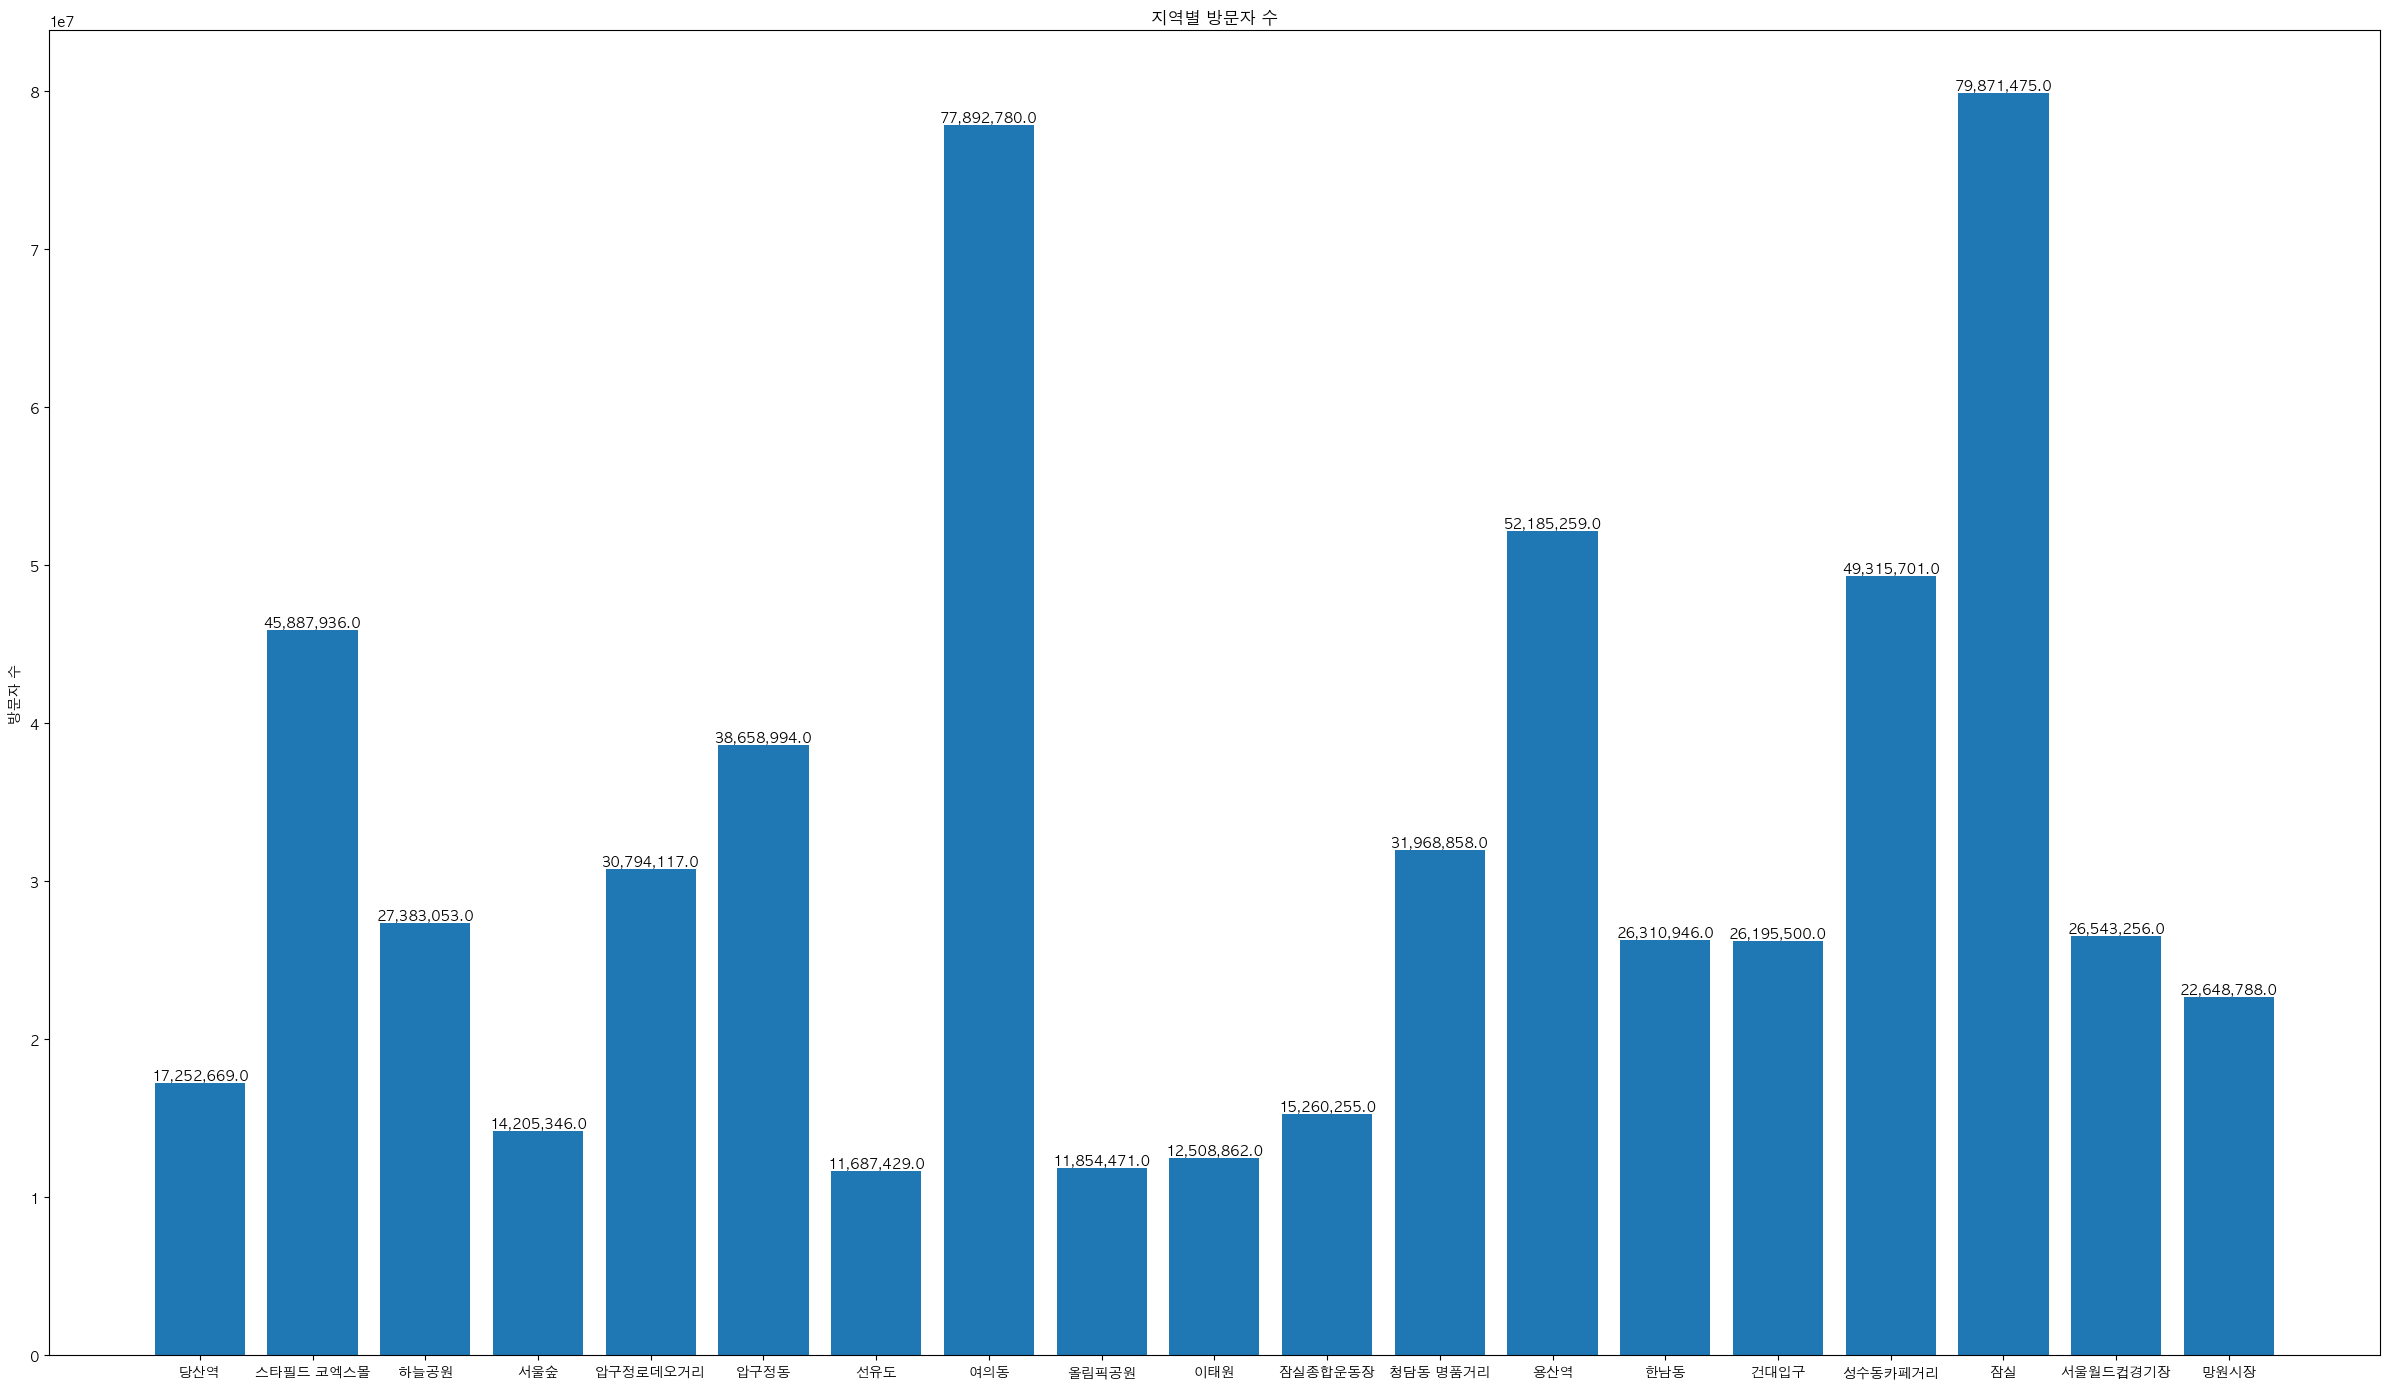

In [15]:
import matplotlib.pyplot as plt

# 새로운 데이터프레임 생성
hotplace_df = new_df_grouped.iloc[[0, 3, 4, 7, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27]].copy()

# '지자체' 이름 변경
hotplace_df.loc[hotplace_df['지자체'] == '삼성1동', '지자체'] = '스타필드 코엑스몰'
hotplace_df.loc[hotplace_df['지자체'] == '성수1가1동', '지자체'] = '서울숲'
hotplace_df.loc[hotplace_df['지자체'] == '신사동', '지자체'] = '압구정로데오거리'
hotplace_df.loc[hotplace_df['지자체'] == '청담동', '지자체'] = '청담동 명품거리'
hotplace_df.loc[hotplace_df['지자체'] == '잠실2동', '지자체'] = '잠실종합운동장'
hotplace_df.loc[hotplace_df['지자체'] == '화양동', '지자체'] = '건대입구'
hotplace_df.loc[hotplace_df['지자체'] == '한강로동', '지자체'] = '용산역'
hotplace_df.loc[hotplace_df['지자체'] == '이태원1동', '지자체'] = '이태원'
hotplace_df.loc[hotplace_df['지자체'] == '오륜동', '지자체'] = '올림픽공원'
hotplace_df.loc[hotplace_df['지자체'] == '상암동', '지자체'] = '하늘공원'
hotplace_df.loc[hotplace_df['지자체'] == '성산동', '지자체'] = '서울월드컵경기장'
hotplace_df.loc[hotplace_df['지자체'] == '망원동', '지자체'] = '망원시장'
hotplace_df.loc[hotplace_df['지자체'] == '합정동', '지자체'] = '합정역'
hotplace_df.loc[hotplace_df['지자체'] == '당산2동', '지자체'] = '당산역'
hotplace_df.loc[hotplace_df['지자체'] == '양평2동', '지자체'] = '선유도'

# 시각화
plt.figure(figsize=(24, 14))
bars = plt.bar(hotplace_df['지자체'], hotplace_df['방문자수'])
plt.title('지역별 방문자 수')
plt.ylabel('방문자 수')

# 각 막대 위에 수치 표시
for i, v in enumerate(hotplace_df['방문자수']):
    plt.text(i, v + 0.5, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()